# Query and Filter data from NeDRex via the Python package

## Goal 1: Familiarize yourself with essential package functions
### Interactive Exercise: Explore the NeDRex node and edge types, and available attributes

Before we start querying data, let's explore some helper functions to navigate the NeDRex knowledge graph:

1. **The first cell just initializes the NeDRex package**
2. **Find the import statement in the second cell**
    - Test and familiarize yourself with those functions.
    - Investigate the available parameters by checking the source definition, if necessary!
3. **Task 1: Find and print the following information**:
    - Task 1.1: What are the available edge and node types?
    - Task 1.2: What are the potential attributes of the "Gene" node type and the "GeneAssociatedWithDisorder" edge type?
    - Task 1.3: Print one example Protein node and PPI edge!
    - Task 1.4: What are the options for main IDs of nodes and edges?

In [10]:
import nedrex
from nedrex.core import get_edge_types, get_node_types, get_collection_attributes

API_LINK = "https://api.nedrex.net/"
nedrex.config.set_url_base(API_LINK)


In [11]:
#Here are the imported/available nedrex functions, test them a little to answer the questions
from nedrex.core import get_edges, get_nodes, get_edge_types, get_node_types, get_collection_attributes

#TODO Task 1.1 What are the available edge and node types?


#TODO Task 1.2: What are the potential attributes of the "Gene" node type and the "GeneAssociatedWithDisorder" edge type?


#TODO Task 1.3: Print one example Protein node and PPI edge!


#TODO Task 1.4 What are the options for main IDs of nodes and edges?

### 🔍 Solution 1 (Hidden - Expand to see the answer)

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>

The following are the correct code fragments:

**Solution 1.1: What are the available edge and node types?**
```Python
print(f"Available node types: {get_node_types()}\n")
print(f"\nAvailable edge types: {get_edge_types()}\n")
```

**Solution 1.2: What are the potential attributes of the "Gene" node type and the "GeneAssociatedWithDisorder" edge type?**
```python
print(f"\nAttributes of gene node: {get_collection_attributes("gene")}\n")
print(f"\nAttributes of gene_associated_with_disorder edge: {get_collection_attributes("gene_associated_with_disorder")}\n")
```

**Solution 1.3: Print one example Protein node and PPI edge!**
```python
print(f"\nExample node:")
for node in get_nodes("protein", limit=1):
    print(node)

print(f"\nExample edge:")
for edge in get_edges("protein_interacts_with_protein",limit=1):
    print(edge)
```

**Solution 1.4: What are the options for main IDs of nodes and edges?**
```python
print(get_nodes("protein", limit=1)[0]["primaryDomainId"])

edge1 = get_edges("protein_interacts_with_protein",limit=1)[0]
print(edge["memberOne"], edge["memberTwo"])

edge2 = get_edges("protein_encoded_by_gene", limit=1)[0]
print(edge["sourceDomainId"], edge["targetDomainId"])
```

**Explanation**:
- The NeDRex Python package comes with an assortment of functions, that allows navigating the available types, their attributes, and to get entries
    - `get_node_types()` and `get_edge_types()` will list all available node and edge types, respectively
    - `get_collection_attributes()` accepts a node or edge type, and returns the list of available properties/attributes
    - `get_nodes()` and `get_edges()` accept a node and edge type, respectively, and additional parameters to query all or only some entries.
    - edge or node entries are stored as dictionaries and individual properties can be requested by using them as the key.
- The main IDs are stored in the "primaryDomainId" attribute for nodes, and depending on the directionality of the edge in the "memberOne"/"memberTwo" attributes or the "sourceDomainId"/"targetDomainId" attributes

</details>

## Goal 2: Query and filter data from the NeDRex knowledge graph

Now that you know, how to check for available attributes, nodes, and edge types, let's continue with actually querying and filtering some data:

1. **The first cell again just imports and defines some helper functions for you**
2. **Find the list of omim ids in the second cell**
3. **As you might have learnt in the first task, nodes and edges come as dictionaries**
3. **Your task: Return the three associated disorder nodes**:
    - Task 2.1: Adjust the filter_disorders() function, such that only disease nodes with an ID in the omim_ids set are saved!
    - Task 2.2: Print the id, name, description, and synonyms of the three disorders!

In [12]:
from tqdm import tqdm
import nedrex
from nedrex.core import iter_nodes, iter_edges, get_edge_types, get_node_types, get_collection_attributes

def iterate_node_collection(coll_name, filter_function):
    for node in tqdm(iter_nodes(coll_name)):
        if filter_function(node):
            yield node

def iterate_edge_collection(coll_name, filter_function):
    for edge in tqdm(iter_edges(coll_name)):
        if filter_function(edge):
            yield edge

In [13]:
omim_ids = {"mondo.0016621","mondo.0042980","mondo.0007739"}

#TODO Task 2.1: Adjust the filter_disorders() function, such that only disease nodes with an ID in the omim_ids set are saved!
def filter_disorders(node) -> bool:
    return False


for disorder in iterate_node_collection("disorder", filter_disorders):
    #TODO Task 2.2: Print the id, name, description, and synonyms of the three disorders!
    print(disorder)


26363it [00:05, 5076.71it/s]


### 🔍 Solution 2 (Hidden - Expand to see the answer)

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>

The following are the correct code fragments:

**Solution 2.1: Adjust the `filter_disorders()` function, such that only disease nodes with an ID in the `omim_ids` set are saved!**

```python
def filter_disorders(node) -> bool:
    return node["primaryDomainId"] in omim_ids
```

**Explanation**:
- A simple check if the "primaryDomainId" of the current node is in the list of requested IDs, is sufficient as it returns `True` if the ID is in the `omim_ids` set and `False`otherwise.


**Solution 2.2: Print the id, name, description, and synonyms of the three disorders!**

```python
for disorder in iterate_node_collection("disorder", filter_disorders):
    print("Disorder ID:", disorder["primaryDomainId"])
    for key in ["displayName", "description", "synonyms"]:
        print(f"\t{key}: {disorder[key]}")
    print("\n")
```


**Explanation**:
- The requested attribute names are `primaryDomainId`, `displayName`, `description`, and `synonyms` and they can be retrieved by using them as key on the `disorder` entry `dict`.

</details>

## Goal 3: Create a network from different information layers

Now that you learnt how you can filter for specific attributes, let's create a whole network of information consisting of multiple information layers for Huntington's disease (diseases under the Huntington's umbrella):

1. **You are given a NedrexGraph class, which as a list of the same IDs as earlier.**
2. **The class further contains a list of node dicts (primaryDomainId will be key, node as value), and edge lists (tuple of node IDs)**
3. **The class comes with some helper functions, like to_networkx_graph() or plot_network(). You can use the third cell to print the size of the current graph and to try to generate a layouted network visualization of it**
4. **The class also comes with functions that load information, that can be chained as follows:**
    ```python
    nedrex_graph = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer()
    ```
    - Tip: There is also one fuction prefixed with "remove_..."


5. **Task 3: Construct a network, that lets you see drugs, that are targeting proteins associated with Huntington's disorder**:
    - Task 3.1: Transfer the disorder_filter function from Task 2.1 (or Solution 2.1 ) into the NedrexGraph Class!
    - Task 3.2: Adjust the protein filter function, that it also filters out all proteins that are not reviewed!
    - Task 3.3: Use the cell below the class definition cell and chain the available `add_...`,  `load_...`, and `remove_...` functions in a way, that a network, that fulfills Task 3 is created!


6. **Bonus Task: Add a ProteinInteractionLayer**:
    - Task B.1: Complete the function for importing the protein_interaction edges from file, filtering, and storing them correctly.
    - Task B.2: Create a new execution chain that includes the protein_interaction layer adding.
    - Task B.3: How much larger is the new network? Compare which drugs are now additionally found that have not been linked to Huntington's disease before!

In [14]:
import networkx as nx

class NedrexGraph:
    huntington_omim_ids = {"mondo.0016621","mondo.0042980","mondo.0007739"}
    filtered_disorders = dict()
    filtered_genes = dict()
    filtered_proteins = dict()
    filtered_drugs = dict()

    disorder_gene_edges = list()
    gene_protein_edges = list()
    protein_drug_edges = list()
    protein_protein_edges = list()

    def __init__(self, api_url="https://api.nedrex.net/"):
        self.filtered_disorders = dict()
        self.filtered_genes = dict()
        self.filtered_proteins = dict()
        self.filtered_drugs = dict()

        self.disorder_gene_edges = list()
        self.gene_protein_edges = list()
        self.protein_drug_edges = list()
        self.protein_protein_edges = list()
        nedrex.config.set_url_base(api_url)

    def plot_network(self):
        import matplotlib.pyplot as plt
        G = self.to_networkx_graph()
        node_labels = self.get_node_labels()

        fig = plt.figure(figsize=[20,20], dpi=100)
        ax = fig.add_subplot(111)
        nx.draw(G, ax=ax,pos=nx.kamada_kawai_layout(G, scale=20),with_labels=True, labels=node_labels)

    def to_networkx_graph(self) -> nx.Graph:
        G = nx.Graph()

        G.add_nodes_from(self.filtered_disorders.items())
        G.add_nodes_from(self.filtered_genes.items())
        G.add_nodes_from(self.filtered_proteins.items())
        G.add_nodes_from(self.filtered_drugs.items())

        G.add_edges_from(self.disorder_gene_edges)
        G.add_edges_from(self.gene_protein_edges)
        G.add_edges_from(self.protein_drug_edges)
        G.add_edges_from(self.protein_protein_edges)
        return G

    def get_node_labels(self):
        node_labels = dict()
        for (k,v) in self.filtered_disorders.items():
            node_labels[k] = v.get("displayName",k) if v is not None else k
        for (k,v) in self.filtered_genes.items():
            node_labels[k] = v.get("displayName",k) if v is not None else k
        for (k,v) in self.filtered_proteins.items():
            node_labels[k] = v.get("displayName",k) if v is not None else k
        for (k,v) in self.filtered_drugs.items():
            node_labels[k] = v.get("displayName",k) if v is not None else k
        return node_labels


    #Node filters
    #TODO Task 3.1: Transfer the disorder_filter function from Task 2.1 (or Solution 2.1 ) into the NedrexGraph Class!
    def _filter_disorders(self, disorder_node) -> bool:
        return False

    #TODO Task 3.2: Adjust the protein filter function, that it also filters out all proteins that are not reviewed!
    def _filter_proteins(self, protein_node) -> bool:
        if protein_node["primaryDomainId"] not in self.filtered_proteins.keys():
            return False
        return True

    #Edge filters
    def _filter_disease_gene_associations(self, edge):
        if edge["targetDomainId"] not in self.huntington_omim_ids:
            return False
        return True

    def _filter_gene_protein_translation(self, edge):
        if edge["targetDomainId"] not in self.filtered_genes.keys():
            return False
        return True

    def _filter_drug_target_filter(self, edge):
        if edge["targetDomainId"] not in self.filtered_proteins.keys():
            return False
        return True


    #Getting nodes and applying filters
    def _get_filtered_nodes(self, type, filter_function):
        filtered_nodes = []
        for node in iterate_node_collection(type, filter_function):
            filtered_nodes.append(node)
        return filtered_nodes

    #Getting edges and applying filters
    def _get_filtered_edges(self, type, filter_function):
        filtered_edges = []
        for edge in iterate_edge_collection(type, filter_function):
            if "memberOne" in edge.keys():
                filtered_edges.append((edge["memberOne"], edge["memberTwo"]))
            else:
                filtered_edges.append((edge["sourceDomainId"], edge["targetDomainId"]))
        return filtered_edges

    # Removing nodes for the nodes dictionaries that were not added due to a filter step
    def _remove_filtered_nodes(self, d):
        del_set = {k for k in d.keys() if d[k] is None}
        for k in del_set:
            del d[k]
        print(f"Left with {len(d)} after removing non-loaded nodes\n")


    # Loading the information for specific nodes
    def load_disorder_nodes(self):
        print("Getting Huntington's disease nodes...")
        disease_nodes = self._get_filtered_nodes("disorder", self._filter_disorders)
        for disease_node in disease_nodes:
            self.filtered_disorders[disease_node["primaryDomainId"]] = disease_node
        print(f"Acquired {len(self.filtered_disorders)} disorder nodes\n")
        return self

    def load_gene_nodes(self):
        print("Getting gene nodes...")
        gene_nodes = self._get_filtered_nodes("gene", lambda node: node["primaryDomainId"] in self.filtered_genes.keys())
        for gene_node in gene_nodes:
            self.filtered_genes[gene_node["primaryDomainId"]] = gene_node
        print(f"Acquired {len(self.filtered_genes)} gene nodes\n")
        return self


    def load_protein_nodes(self):
        print("Getting protein nodes...")
        protein_nodes = self._get_filtered_nodes("protein", self._filter_proteins)
        for protein_node in protein_nodes:
            self.filtered_proteins[protein_node["primaryDomainId"]] = protein_node

        print(f"Acquired {len(self.filtered_proteins)} protein nodes\n")
        return self

    def load_drug_nodes(self):
        print("Getting drug nodes...")
        drug_nodes = self._get_filtered_nodes("drug", lambda node: node["primaryDomainId"] in self.filtered_drugs.keys())
        for drug in drug_nodes:
            self.filtered_drugs[drug["primaryDomainId"]] = drug
        print(f"Acquired {len(self.filtered_drugs)} drug nodes\n")
        return self


    # Loading the information for specific edges
    def add_disorder_gene_layer(self):
        print("Getting connected gene node ids...")
        gene_disease_edges = self._get_filtered_edges("gene_associated_with_disorder", self._filter_disease_gene_associations)
        for gene_id, disease_id in gene_disease_edges:
            self.disorder_gene_edges.append((gene_id, disease_id))
            self.filtered_genes[gene_id] = None
        print(f"Found {len(self.disorder_gene_edges)} connections")
        return self

    def add_gene_protein_layer(self):
        print("Getting connected protein node ids...")
        protein_gene_edges = self._get_filtered_edges("protein_encoded_by_gene", self._filter_gene_protein_translation)
        for protein_id, gene_id in protein_gene_edges:
            self.filtered_proteins[protein_id] = None
            self.gene_protein_edges.append((gene_id, protein_id))
        print(f"Found {len(self.gene_protein_edges)} connections")
        return self

    def remove_filtered_proteins(self):
        self._remove_filtered_nodes(self.filtered_proteins)
        return self


    #TODO  Bonus Task B.1: Complete the function for importing the protein_interaction edges from file, filtering, and storing them correctly.
    def add_protein_interaction_layer(self):
        print("Reading ppi information from previous file...")
        new_proteins = set()
        with open("../../data/NeDRex_api/filtered_ppi_only_reviewed_proteins_solution.csv", "r") as fr:
            for line in fr.readlines():
                if "," in line:
                    ppi = line.strip().split(",")
                    #TODO Bonus Task B.1: handle ppi information
        for new_protein in new_proteins:
            self.filtered_proteins[new_protein] = None
        print(f"Added {len(new_proteins)} protein IDs through PPI")
        return self

    def add_protein_drug_layer(self):
        print("Getting connected drug node ids...")
        protein_drug_edges = self._get_filtered_edges("drug_has_target", self._filter_drug_target_filter)
        for drug_id, protein_id in protein_drug_edges:
            self.protein_drug_edges.append((drug_id, protein_id))
            self.filtered_drugs[drug_id] = None
        print(f"Found {len(self.protein_drug_edges)} connections")
        return self



In [15]:
#TODO Task 3.3: Use the this cell and complete the chain with the available add_... and load_... functions in a way, that a network, that fulfills Task 3 is created. You can always use the cell below to visualize the current network.

####Available functions###
# loading node information with: load_gene_nodes(), load_protein_nodes(), load_disorder_nodes(), load_protein_nodes()
# adding another network layer with: add_disorder_gene_layer(), add_protein_drug_layer(), add_gene_protein_layer(), add_protein_interaction_layer()
# remove_unmapped_proteins: remove_filtered_proteins()

huntingtons_graph = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer()

Getting Huntingtons disease nodes...


26363it [00:04, 5656.07it/s]


Acquired 0 disorder nodes

Getting connected gene node ids...


48511it [00:04, 10504.26it/s]

Found 29 connections


Created Huntington's graph with 36 nodes and 29 edges


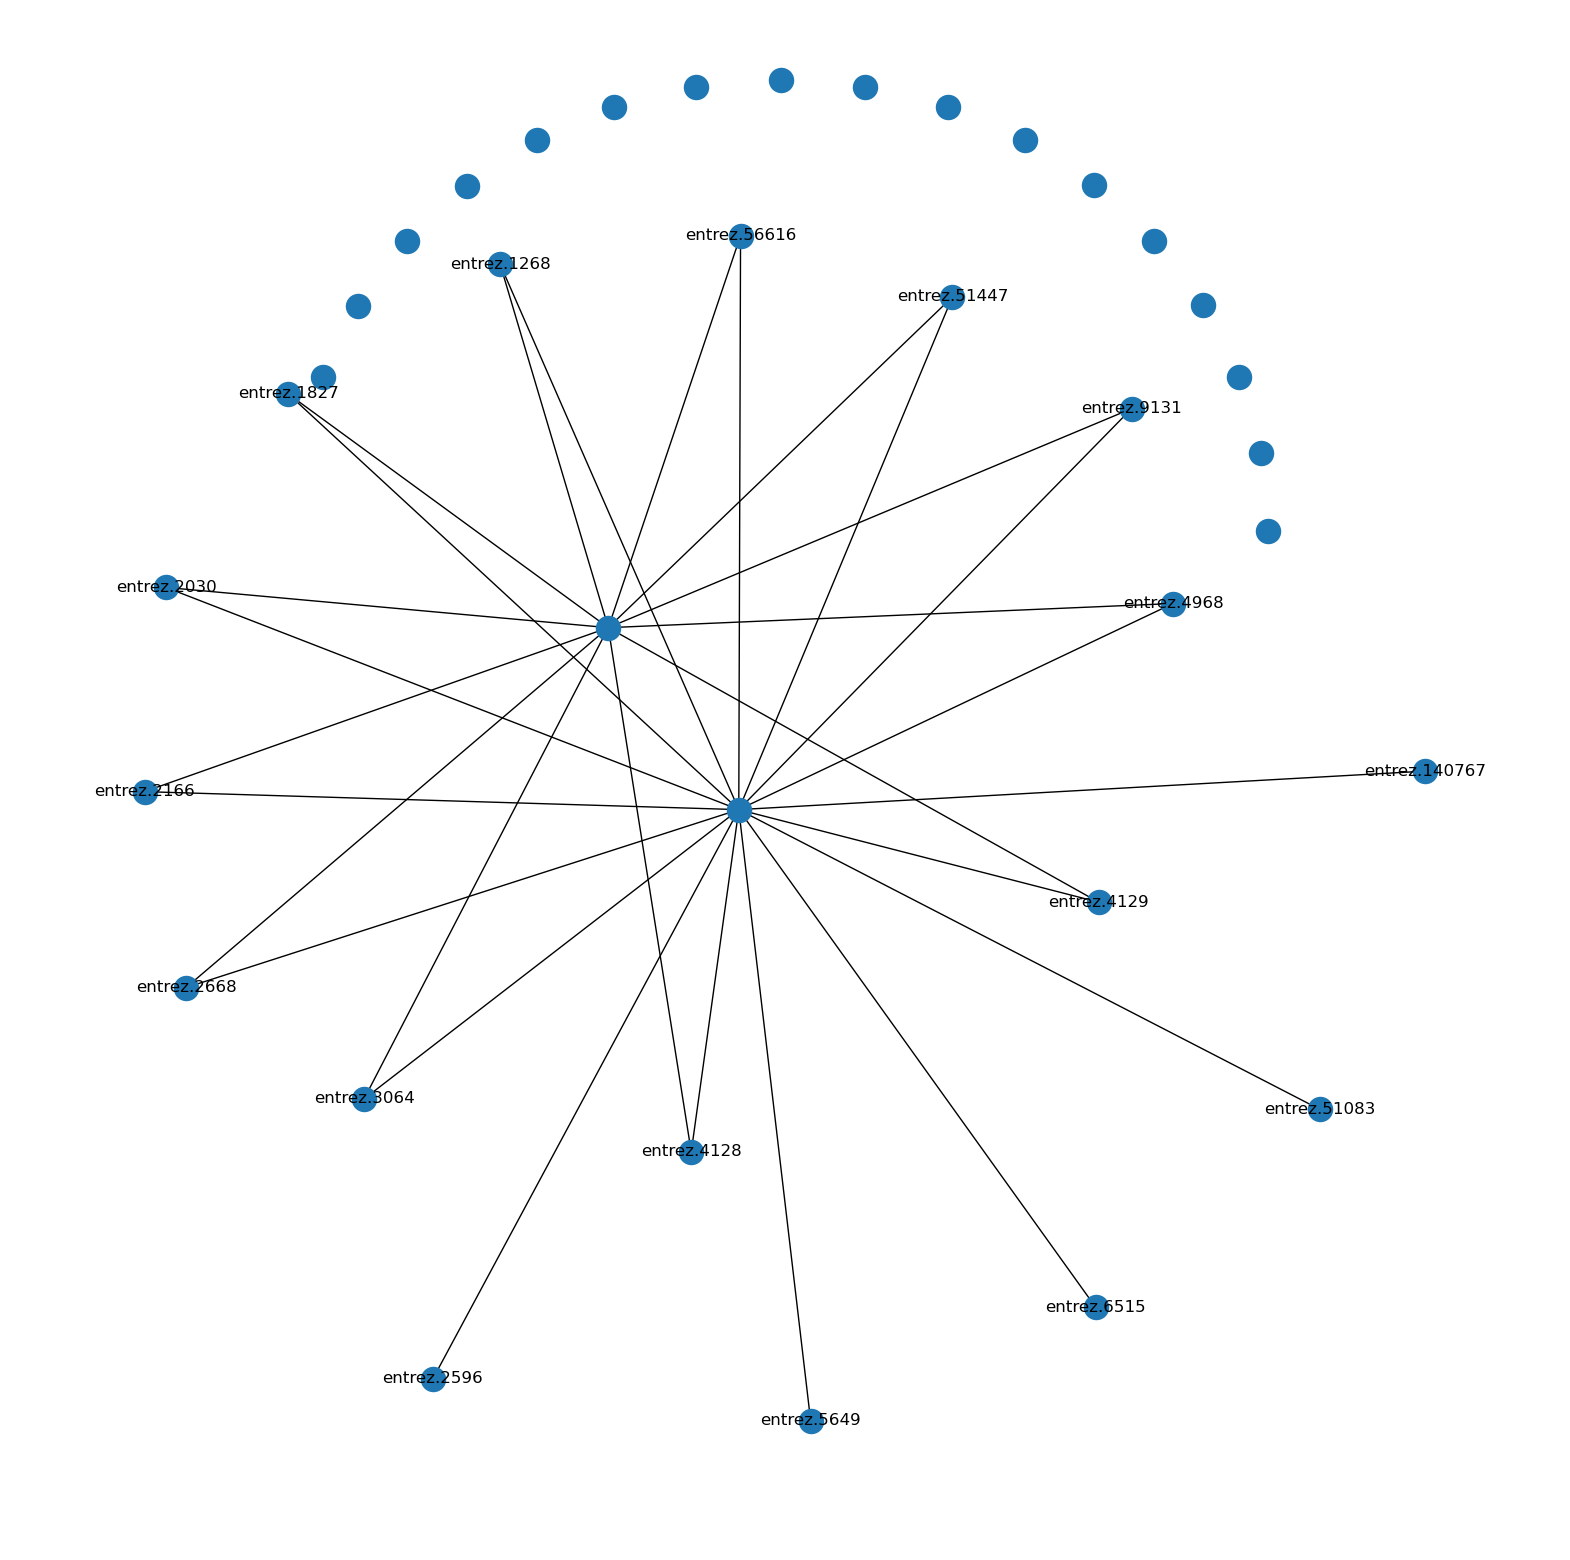

In [16]:
G = huntingtons_graph.to_networkx_graph()
print(f"Created Huntington's graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges")
huntingtons_graph.plot_network()


In [17]:
#TODO Bonus Task B.2: Create a new execution chain that includes the protein_interaction layer adding.
huntingtons_graph_with_ppi = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer()

Getting Huntingtons disease nodes...


26363it [00:04, 5574.39it/s]


Acquired 0 disorder nodes

Getting connected gene node ids...


48511it [00:03, 13488.44it/s]

Found 29 connections


In [18]:
#TODO Bonus Task B.3: How much larger is the new network? Compare which drugs are now additionally found that have not been linked to.

additional_drugs = []

for drug in additional_drugs:
    print("Drug ID:", drug["primaryDomainId"])
    for key in drug.keys():
        print(f"\t{key}: {drug[key]}")
    print("\n")

### 🔍 Solution 3 (Hidden - Expand to see the answer)

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>

The following are the correct code fragments:


**Task 3: Construct a network, that lets you see drugs, that are targeting proteins associated with Huntington's disorder:**



**Solution 3.1: Transfer the `disorder_filter()` function from Task 2.1 (or Solution 2.1 ) into the NedrexGraph Class!**
```python
def _filter_disorders(self, disorder_node) -> bool:
    return disorder_node["primaryDomainId"] in omim_ids
```

**Explanation**:
- The function is transferred from the previous task, only the function name is adjusted.


**Solution 3.2: Adjust the protein filter function, that it also filters out all proteins that are not reviewed.**
```python
def _filter_proteins(self, protein_node) -> bool:
    if protein_node["primaryDomainId"] not in self.filtered_proteins.keys():
        return False
    return protein_node.get("is_reviewed","False") == "True"
```
**Explanation**:
- The filter was updated by replacing the final `return True` with another check.
- The necessary property is `is_reviewed` (identified by using `get_collection_attributes("protein_interacts_with_protein")`) and is accessed here with the `.get()` function, to set a default, in case the property is not available.


**Solution 3.3: Use the cell below the class definition cell and chain the available `add_...`,  `load_...`, and `remove_...` functions in a way, that a network, that fulfills Task 3 is created!**

```python
huntingtons_graph = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer().load_gene_nodes().add_gene_protein_layer().load_protein_nodes().remove_filtered_proteins().add_protein_drug_layer().load_drug_nodes()
```

**Explanation**:
- A requested network, starting to connect from a list of disorders through genes, proteins, and drugs, has to be build in the correct order:
        1. As given, the disorder nodes have to be gathered, based on the ID list using `load_disorder_nodes()`.
        2. The connections to the genes can be established, using `add_disorder_gene_layer()`.
        3. Again, the node IDs, here genes, have to be resolved to the actual nodes, by applying `load_gene_nodes()`.
        4. 
</details>

### 🔍 Solution Bonus Task (Hidden - Expand to see the answer)

<details>
<summary>Click here to see the solution after you've tried exploring the functions</summary>

The following are the correct code fragments:

**Bonus Task: Add a ProteinInteractionLayer**:


**Solution B.1: Complete the function for importing the protein_interaction edges from file, filtering, and storing them correctly.**

```python
def add_protein_interaction_layer(self):
    print("Reading ppi information from previous file...")
    new_proteins = set()
    with open("../../data/NeDRex_api/filtered_ppi_only_reviewed_proteins_solution.csv", "r") as fr:
        for line in fr.readlines():
            if "," in line:
                ppi = line.strip().split(",")
                if ppi[0] == ppi[1]:
                    continue
                protein_id_1 = f"uniprot.{ppi[0]}"
                protein_id_2 = f"uniprot.{ppi[1]}"
                protein_id_1_present = protein_id_1 in self.filtered_proteins.keys()
                protein_id_2_present = protein_id_2 in self.filtered_proteins.keys()
                if protein_id_1_present or protein_id_2_present:
                    self.protein_protein_edges.append((protein_id_1, protein_id_2))
                    if protein_id_1_present:
                        new_proteins.add(protein_id_2)
                    if protein_id_2_present:
                        new_proteins.add(protein_id_1)
    for new_protein in new_proteins:
        self.filtered_proteins[new_protein] = None
    print(f"Added {len(new_proteins)} protein IDs through PPI")
    return self
```

**Explanation:**
- "Self interactions" of proteins are filtered first, this is not necessary, but as those do not add any information for the network, they can be removed `if ppi[0] == ppi[1]: continue`
- The previously stored IDs have to be prefixed, to allow correct ID matching: `protein_id = f"uniprot.{ppi[0]}"`
- Then it is determined, if and which one of the interacting proteins is in the list of loaded proteins `protein_id_present = protein_id in self.filterd_proteins.keys()`:
    - If no interaction partner is present -> the interaction edge will not be added
    - If any of the two interacting proteins is present, this means the edge is relevant `if protein_id_1_present or protein_id_2_present: self.protein_protein_edges.append((protein_id_1, protein_id_2))` .
    - If interacting protein 1 is already present, then protein 2 needs adding to the list of relevant proteins, and vice versa `if protein_id_1_present: new_proteins.add(protein_id_2)`.

**Solution B.2: Create a new execution chain that includes the protein_interaction layer adding.**

```python
huntingtons_graph_with_ppi = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer().load_gene_nodes().add_gene_protein_layer().load_protein_nodes().remove_filtered_proteins().add_protein_interaction_layer().load_protein_nodes().remove_filtered_proteins().add_protein_drug_layer().load_drug_nodes()

```
**Explanation:**
- The `add_protein_interaction_layer()` needs to be placed after the protein IDs are filtered regarding their review status through `load_protein_nodes()`.
- This of course means, that afterward the newly added protein IDs need to be revolved to nodes again and filtered another time. `.add_protein_interaction_layer().load_protein_nodes().remove_filtered_proteins()`
- Theoretically, the ppi_edge list (as also the gene_protein edge list) would need filtering, as not all edges are satisfied now due to removed proteins that did not match the filter criteria.


**Solution B.3: How much larger is the new network? Compare which drugs are now additionally found that have not been linked to Huntington's disease before!**

```python
huntingtons_graph = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer().load_gene_nodes().add_gene_protein_layer().load_protein_nodes().remove_filtered_proteins().add_protein_drug_layer().load_drug_nodes()

G_without_ppi = huntingtons_graph.to_networkx_graph()
print(f"Created Huntington's graph without PPI Layer with {G_without_ppi.number_of_nodes()} nodes and {G_without_ppi.number_of_edges()} edges")

huntingtons_graph_with_ppi = NedrexGraph().load_disorder_nodes().add_disorder_gene_layer().load_gene_nodes().add_gene_protein_layer().add_protein_interaction_layer().load_protein_nodes().remove_filtered_proteins().add_protein_drug_layer().load_drug_nodes()
G_with_ppi= huntingtons_graph_with_ppi.to_networkx_graph()

print(f"Created Huntington's graph with PPI Layer with {G_with_ppi.number_of_nodes()} nodes and {G_with_ppi.number_of_edges()} edges")

additional_drugs = [v for k,v in huntingtons_graph_with_ppi.filtered_drugs.items() if k in huntingtons_graph.filtered_drugs.keys()]
for drug in additional_drugs:
    print("Drug ID:", drug["primaryDomainId"])
    for key in drug.keys():
        print(f"\t{key}: {drug[key]}")
    print("\n")
```

**Explanation:**
- First, both versions of the networks are created, once with and once without ppi layer in the middle.
- General statistics are printed
- The `additional_drugs` that were identified in the second step were obtained by identifying all drugs that only appeared in the `huntingtons_graph_with_ppi` network but not in the `huntingtons_graph` network.

</details>